# S-MODE Workshop: Science Case Study In Situ

imported on: **2024-04-26**

<p>This notebook is from a different repository in NASA's PO.DAAC, 2022-SMODE-Open-Data-Workshop</p>

> The original source for this document is [https://github.com/podaac/2022-SMODE-Open-Data-Workshop/blob/main/notebooks/insitu_dataviz_demo.ipynb](https://github.com/podaac/2022-SMODE-Open-Data-Workshop/blob/main/notebooks/insitu_dataviz_demo.ipynb)

In [3]:
import glob
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import gsw

# S-MODE Data Workshop: in-situ data demo

This is a simple demo of a workflow for downloading and working with S-MODE in-situ data. We will work with underway data collected by saildrones and R/V Oceanus during the S-MODE Pilot Campaign.

If you have any questions, do not hesitate in contacting me (cesar.rocha@uconn.edu).

### Road map

1. Download saildrone data
2. Load and plot single dataset (one saildrone)
3. Load and merge multiple datasets (five saildrones)
4. Compare saildrone ADCP data with R/V Oceanus ADCP data

### First, download the saildrone data
The saildrone data are organized into two different sets of files: ADCP (velocity measurements) and NON-ADCP (everything else). The ADCP data are available in 5-minute averages. The NON-ADCP data are available in 1-minute averages.

In [4]:
# constants for podaac-data-downloader
start_time = '2021-10-20T00:00:00Z'
end_time = '2021-11-08T00:00:00Z'
short_name = 'SMODE_LX_SAILDRONES_V1'
data_path = 'data/'

In [5]:
!podaac-data-downloader -c $short_name -d $data_path$short_name --start-date $start_time --end-date $end_time

/Users/crocha/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
[2022-11-28 19:19:40,724] {podaac_data_downloader.py:243} INFO - Found 10 total files to download
[2022-11-28 19:19:40,772] {podaac_data_downloader.py:268} INFO - 2022-11-28 19:19:40.772325 SKIPPED: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SMODE_LX_SAILDRONES_V1/SMODE_PFC_saildrone_adcp_1074.nc
[2022-11-28 19:19:40,812] {podaac_data_downloader.py:268} INFO - 2022-11-28 19:19:40.812388 SKIPPED: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SMODE_LX_SAILDRONES_V1/SMODE_PFC_saildrone_adcp_1075.nc
[2022-11-28 19:19:40,852] {podaac_data_downloader.py:268} INFO - 2022-11-28 19:19:40.852458 SKIPPED: https://archive.podaac.earthdata.nasa.gov/p

### Non-ADCP data

##### Single saildrone

In [12]:
ds = xr.open_dataset(data_path + short_name + '/SMODE_PFC_saildrone_nonadcp_1073.nc').isel(trajectory=0)

In [13]:
ds

<xarray.Dataset>
Dimensions:                         (obs: 27360)
Coordinates:
    latitude                        (obs) float64 ...
    longitude                       (obs) float64 ...
    time                            (obs) datetime64[ns] ...
    trajectory                      float32 1.073e+03
Dimensions without coordinates: obs
Data variables: (12/76)
    SOG                             (obs) float64 ...
    SOG_FILTERED_MEAN               (obs) float64 ...
    SOG_FILTERED_STDDEV             (obs) float64 ...
    SOG_FILTERED_MAX                (obs) float64 ...
    SOG_FILTERED_MIN                (obs) float64 ...
    COG                             (obs) float64 ...
    ...                              ...
    BKSCT_RED_STDDEV                (obs) float64 ...
    WATER_CURRENT_SPEED_MEAN        (obs) float64 ...
    WATER_CURRENT_DIRECTION_MEAN    (obs) float64 ...
    corrected_backscatter_at_650nm  (obs) float64 ...
    particulate_organic_carbon      (obs) float64 ...
    calibrated_chlorophyll          (obs) float64 ...
Attributes: (12/64)
    title:                         S-MODE Pilot Campaign Fall 2021 Temperatur...
    summary:                       1min surface metereological and oceanograp...
    ncei_template_version:         NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:                   CF-1.8, ACDD-1.3
    netcdf_version:                4.6.3
    featureType:                   trajectory
    ...                            ...
    acknowledgement:               We thank Paban Bhuyan (UConn) and Kim Spar...
    time_coverage_start:           2021-10-19T00:00:00Z
    time_coverage_end:             2021-11-06T23:59:00Z
    geospatial_lon_min:            -125.57976388888889
    geospatial_lon_max:            -122.39241944444444
    id:                            SMODE_LX_SAILDRONES_V1

#### A few quick-and-dirty plots

Text(0.5, 1.0, 'SD-1073')

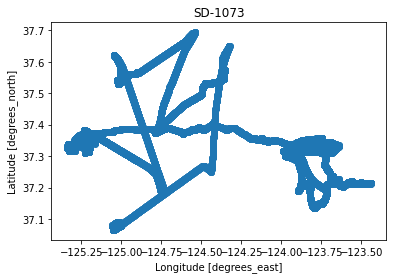

In [17]:
ds.plot.scatter(x='longitude',y='latitude')
plt.title('SD-'+str(int(ds.trajectory)))

Text(0.5, 1.0, 'SD-1073')

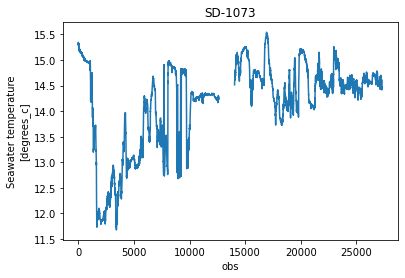

In [21]:
# plot seabird-37 temperature data
ds.TEMP_SBE37_MEAN.plot()
plt.title('SD-'+str(int(ds.trajectory)))

Text(0.5, 1.0, 'SD-1073')

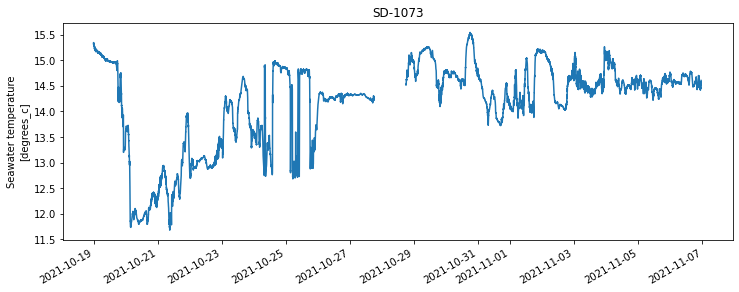

In [22]:
# plot data as a timeseries
fig, ax = plt.subplots(figsize=(12,4))
ds.TEMP_SBE37_MEAN.plot(x='time',ax=ax)
ax.set_xlabel('')
plt.title('SD-'+str(int(ds.trajectory)))

Text(0.5, 1.0, 'SD-1073')

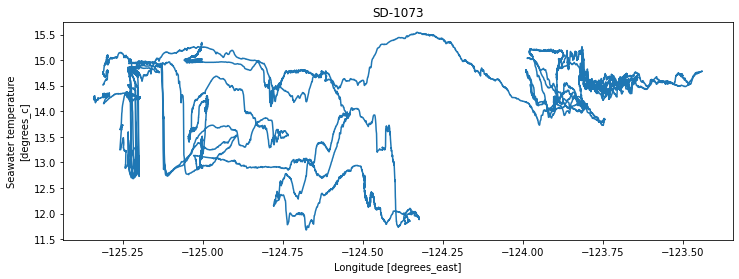

In [25]:
# plot dat as a function of longitude
fig, ax = plt.subplots(figsize=(12,4))
ds.TEMP_SBE37_MEAN.plot(x='longitude',ax=ax)
plt.title('SD-'+str(int(ds.trajectory)))

Text(0.5, 1.0, 'SD-1073')

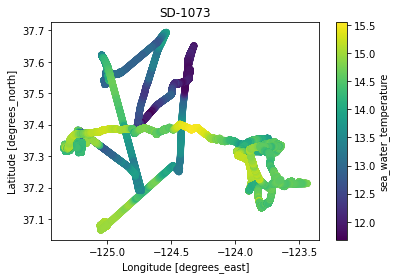

In [32]:
im = ds.plot.scatter(x='longitude',y='latitude',c=ds.TEMP_SBE37_MEAN)
plt.colorbar(im,label=ds.TEMP_SBE37_MEAN.attrs['standard_name'])
plt.title('SD-'+str(int(ds.trajectory)))

Text(0.5, 1.0, 'SD-1073')

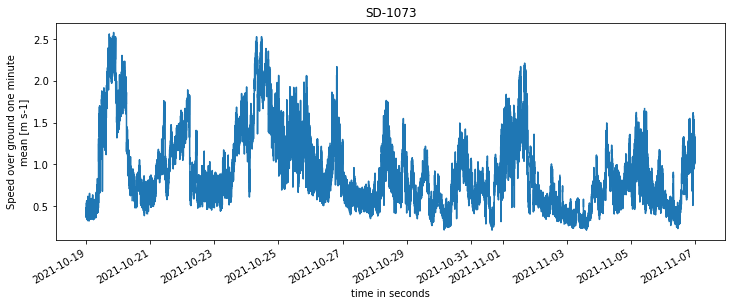

In [30]:
# time speed of saildrone speed relative to ground
fig, ax = plt.subplots(figsize=(12,4))
ds.SOG_FILTERED_MEAN.plot(x='time')
plt.title('SD-'+str(int(ds.trajectory)))

#### Example: calculate density, a derived quantitty

In [33]:
ds['sigma0'] = gsw.sigma0(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN)

# ds.sigma0.attrs['standard_name'] = 'sea_water_potential_density'
# ds.sigma0.attrs['long_name'] = 'Seawater potential density'
# ds.sigma0.attrs['units'] = 'kg m^{-3}'


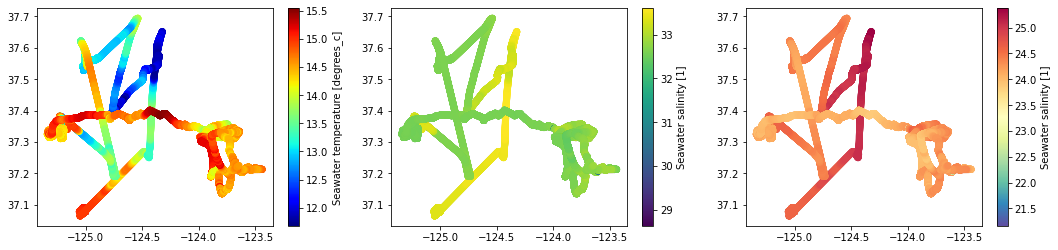

In [34]:
# Now plot temperature, salinity and density
fig, axs = plt.subplots(1,3,figsize=(18,4))

variables = [
    ds.TEMP_SBE37_MEAN, 
    ds.SAL_SBE37_MEAN, 
    ds.sigma0
]

cmaps = ['jet', 'viridis','Spectral_r']

for  ax, var, cmap in zip(axs, variables, cmaps):

    im = ax.scatter(ds.longitude,ds.latitude,c=var,cmap=cmap)
    fig.colorbar(im,ax=ax,label=var.attrs['long_name'] + ' [' + var.attrs['units'] + ']')

### All saildrones
Oftentimes it is conveninent to have all saildrone data in a single dataset for easy manipulation and comparisons.

In [35]:
files = glob.glob(data_path + short_name + '/*_nonadcp_*')

drop_vars = ['TEMP_DEPTH_HALFMETER_MEAN',
             'TEMP_DEPTH_HALFMETER_STDDEV',
             'corrected_backscatter_at_650nm',
             'particulate_organic_carbon',
             'calibrated_chlorophyll'
            ]

# loop through files (i.e., different saildrones),
# open dataset, drop variables not available for all
# saildrones and concatenate datasets along the trajectory
# dimension

for file in files:

    foo = xr.open_dataset(file)
    
    for drop_var in drop_vars:
        if drop_var in foo.variables:
            foo = foo.drop(drop_var)
    
    foo = foo.isel(trajectory=0).swap_dims(
        {'obs':'time'}
    ).expand_dims('trajectory')

    if file == files[0]:
        nonadcp = foo
    else:
        nonadcp = xr.concat([nonadcp,foo],dim='trajectory')

In [36]:
# single saildrone dataset is a subset of nonadcp dataset
nonadcp73 = nonadcp.sel(trajectory=1073.)

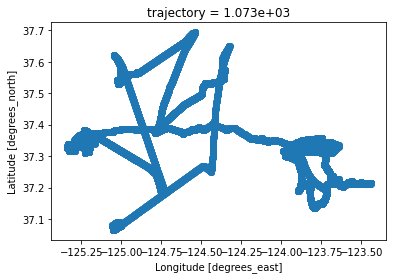

In [38]:
# project 1073's trajectory
nonadcp73.plot.scatter(x='longitude',y='latitude')

Text(0.5, 1.0, '')

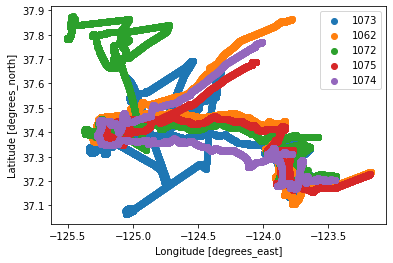

In [43]:
# plot all trajectories
for sd in nonadcp.trajectory:
    nonadcp.sel(trajectory=sd).plot.scatter(x='longitude',y='latitude',label=int(sd.values))
    
plt.legend()
plt.title('')

### ADCP data

##### Single file: saildrone 1072

In [45]:
adcp72 = xr.open_dataset(data_path + short_name + '/SMODE_PFC_saildrone_adcp_1072.nc').isel(trajectory=0)
adcp73 = xr.open_dataset(data_path + short_name + '/SMODE_PFC_saildrone_adcp_1073.nc').isel(trajectory=0)

In [46]:
# Slice the data in time, assigning a 3-day subset

# virtual mooring
# t0 = np.datetime64('2021-11-23T12')
# t1 = np.datetime64('2021-11-28T12')

# formation sailing
# t0 = np.datetime64('2021-11-01T04')
# t1 = np.datetime64('2021-11-01T18')

# comparison with oceanus
t0 = np.datetime64('2021-11-06T16')
t1 = np.datetime64('2021-11-06T20')

subset72 = adcp72.where((adcp72.time>=t0)&(adcp72.time<=t1),drop=True) 
subset73 = adcp73.where((adcp73.time>=t0)&(adcp73.time<=t1),drop=True) 

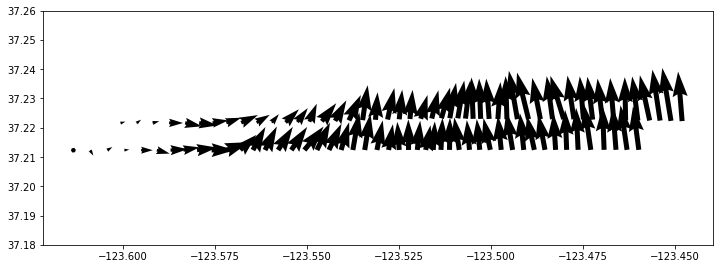

In [62]:
depth_bin = 2

fig, ax = plt.subplots(figsize=(12,8))

for subset in [subset72,subset73]:

    ax.quiver(
        subset.longitude,
        subset.latitude,
        subset.vel_east.isel(cell_depth=depth_bin),
        subset.vel_north.isel(cell_depth=depth_bin),
        scale = 6
    )

ax.set_ylim(37.18,37.26)
ax.set_aspect(np.cos(37.22*np.pi/180))

[(80.0, 0.0), (80.0, 0.0)]

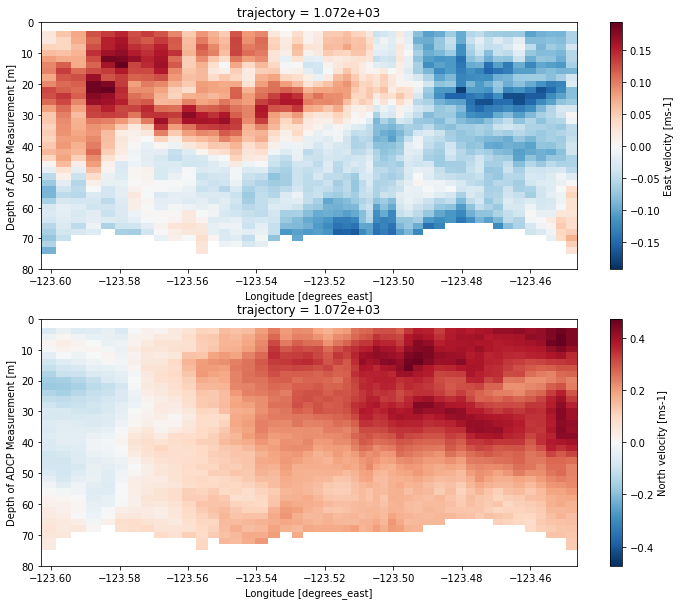

In [66]:
# Example: vertical sections
fig, axs = plt.subplots(2,1, figsize=(12,10))
subset72.vel_east.where(subset72.percent_good>95).plot(x='longitude',y='cell_depth',ax=axs[0])
subset72.vel_north.where(subset72.percent_good>95).plot(x='longitude',y='cell_depth',ax=axs[1])
[ax.set_ylim(80,0) for ax in axs]

(18937.666666666668, 18937.833333333332)

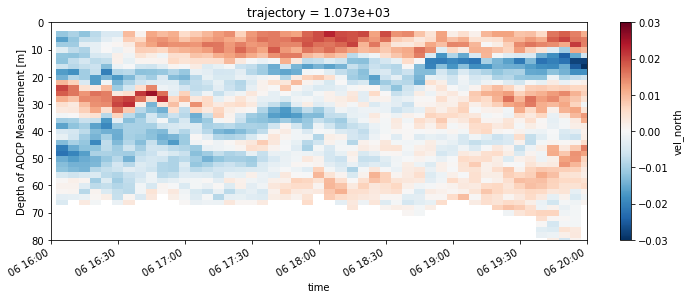

In [67]:
# Example: calculate and plot vertical shear
fig, ax = plt.subplots(figsize=(12,4))
kw = {'vmin': -0.03,'vmax': 0.03,'cmap': 'RdBu_r'}

subset.vel_north.differentiate('cell_depth').where(subset.percent_good>95).plot(x='time',**kw)

plt.ylim(80,0)
plt.xlim(t0,t1)

## Compare saildrone ADCP data with R/V Oceanus data

A major goal of the S-MODE Pilot was to compare saildrone ADCP data. Here's one example of a simple saildrone-Oceanus velocity comparison.

In [68]:
# this is not working for the Oceanus ADCP
start_time = '2021-10-20T00:00:00Z'
start_time = '2021-08-01T00:00:00Z'
end_time = '2021-11-08T00:00:00Z'

short_name = 'SMODE_LX_SHIPBOARD_ADCP_V1'
!podaac-data-downloader -c $short_name -d data/$short_name --start-date $start_time --end-date $end_time -e .nc4

/Users/crocha/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
[2022-11-28 19:46:35,848] {podaac_data_downloader.py:243} INFO - Found 2 total files to download
[2022-11-28 19:46:35,885] {podaac_data_downloader.py:268} INFO - 2022-11-28 19:46:35.885322 SKIPPED: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SMODE_LX_SHIPBOARD_ADCP_V1/S-MODE_PFC_OC2108A_adcp_os75nb.nc4
[2022-11-28 19:46:35,967] {podaac_data_downloader.py:268} INFO - 2022-11-28 19:46:35.967540 SKIPPED: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SMODE_LX_SHIPBOARD_ADCP_V1/S-MODE_PFC_OC2108A_adcp_wh300.nc4
[2022-11-28 19:46:35,967] {podaac_data_downloader.py:287} INFO - Downloaded Files: 0
[2022-11-28 19:46:35,967] {podaac_data_downloader

In [69]:
ds = xr.open_dataset('data/SMODE_LX_SHIPBOARD_ADCP_V1/S-MODE_PFC_OC2108A_adcp_wh300.nc4',drop_variables='depth').isel(trajectory=0)
ds['depth'] =  Dataset('data/SMODE_LX_SHIPBOARD_ADCP_V1/S-MODE_PFC_OC2108A_adcp_wh300.nc4')['depth'][0]

In [70]:
subset_oceanus = ds.where((ds.time>=t0)&(ds.time<=t1),drop=True) 

In [71]:
# interpolate to subset72 time
# TODO: try to resample with averaging to 5 minutes before interpolating (e.g.,  subset_oceanus.resample(time='5min').mean())
subset_oceanus = subset_oceanus.interp({'time': subset72.time})

/Users/crocha/miniconda3/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/Users/crocha/miniconda3/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")


In [72]:
# interpolate to saildrone depth to oceanus depth
subset72['depth'] = subset72.cell_depth + 1.9  # add depth of the instrument 1.9
subset72 = subset72.swap_dims({'cell_depth': 'depth'})
subset72 = subset72.interp({'depth': subset_oceanus.depth})

/Users/crocha/miniconda3/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/Users/crocha/miniconda3/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")


#### Visual comparison

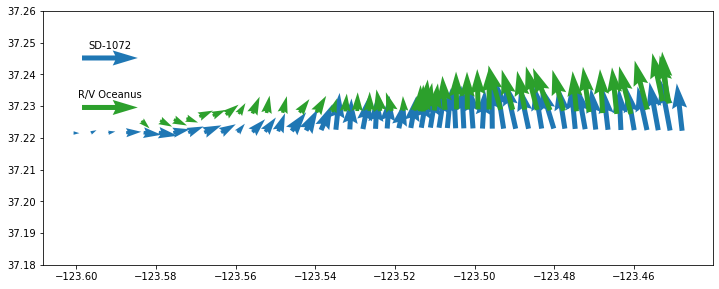

In [79]:
depth_bin = 1
sc = 6

fig, ax = plt.subplots(figsize=(12,8))

q1 = plt.quiver(
        subset72.longitude,
        subset72.latitude,
        subset72.vel_east.isel(depth=depth_bin),
        subset72.vel_north.isel(depth=depth_bin),
        color='C00',scale=sc
)


q2 = plt.quiver(
        subset_oceanus.longitude,
        subset_oceanus.latitude,
        subset_oceanus.zonal_velocity_component.isel(depth=depth_bin),
        subset_oceanus.meridional_velocity_component.isel(depth=depth_bin),
        color='C02', scale=sc
)

plt.quiverkey(q1, .1, 0.815, .5, 'SD-1072',)
plt.quiverkey(q2, .1, 0.620, .5, 'R/V Oceanus',)

ax.set_ylim(37.18,37.26)
ax.set_aspect(np.cos(37.22*np.pi/180))

[(80.0, 0.0), (80.0, 0.0)]

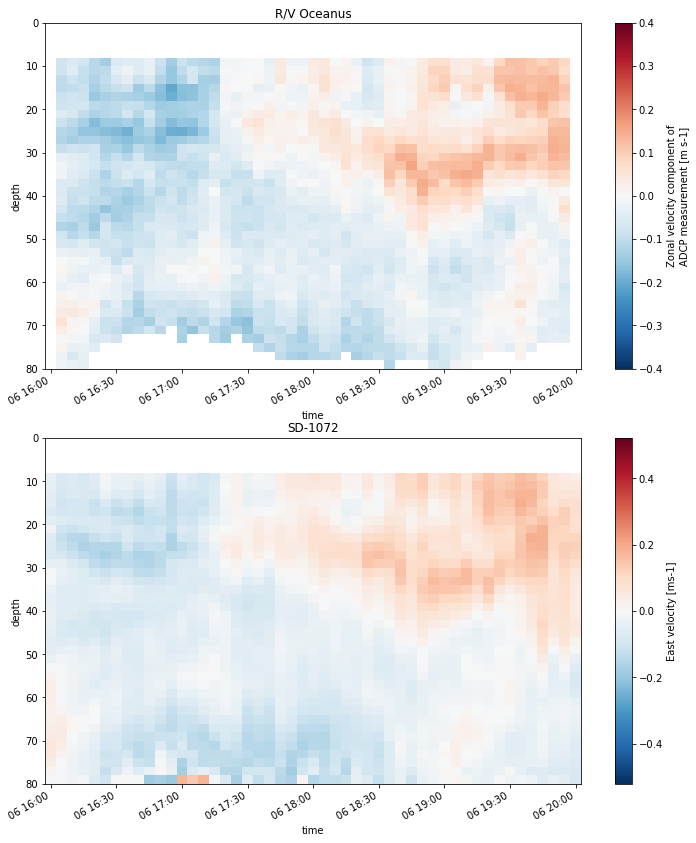

In [84]:
fig, axs = plt.subplots(2,1,figsize=(12,14))

kw = {'vmin': -.4,'vmax': +.4,'cmap': 'RdBu_r'}

subset_oceanus.zonal_velocity_component.plot(x='time',y='depth',ax=axs[0],**kw)
subset72.vel_east.plot(x='time',y='depth',ax=axs[1])

axs[0].set_title('R/V Oceanus')
axs[1].set_title('SD-1072')

[ax.set_ylim(80,0) for ax in axs]

#### Quantitative comparison: calculate and plot velocity differences

In [85]:
subset_oceanus = subset_oceanus.where(subset_oceanus.depth<=70)
subset72 =  subset72.where(subset_oceanus.depth<=70)

In [86]:
du = subset_oceanus.zonal_velocity_component-subset72.vel_east
dv = subset_oceanus.meridional_velocity_component-subset72.vel_north

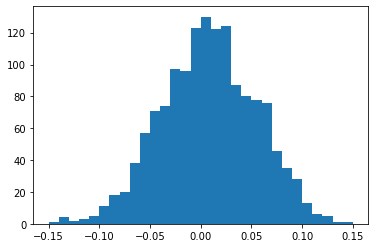

In [88]:
_ = plt.hist(dv.values.flatten(),bins=np.arange(-.15,.156,.01))

In [90]:
du.mean().values, dv.mean().values

(array(-0.01207606), array(0.00744287))

In [89]:
du.std().values, dv.std().values

(array(0.03616049), array(0.04748247))